In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import glob
files = glob.glob('/home/pmcroot/data1/2016-08-07_sunrise/*.npz')
files.sort()

In [3]:
import scipy.ndimage

In [4]:
import sys

In [5]:
sys.path.append('/home/pmchome/pmc-turbo/')

In [78]:
import pmc_camera.star_finding.blobs as blobs
reload(blobs)

<module 'pmc_camera.star_finding.blobs' from '/home/pmchome/pmc-turbo/pmc_camera/star_finding/blobs.pyc'>

In [92]:
files[4010]

'/home/pmcroot/data1/2016-08-07_sunrise/2016-08-07_054213_focus_step_0010.npz'

In [134]:
im = np.load(files[4110])['image']

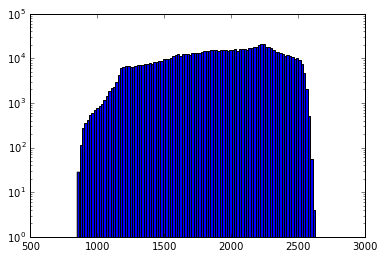

In [156]:
 _=hist(im[::4,::4].flatten()/16.,bins=100,log=True)

In [138]:
bf = blobs.BlobFinder(im,cell_size=32,blob_threshold=7,kernel_size=12,fit_blobs=False,kernel_sigma=1)

In [176]:
bf.cells.shape

(8, 32, 8, 32)

In [80]:
len(bf.blobs)

22

In [192]:
bf.blobs

[Blob(x=52,y=63,peak=1913.6643494601904,sigma=None]

In [125]:
bf.cells.shape

(101, 32, 152, 32)

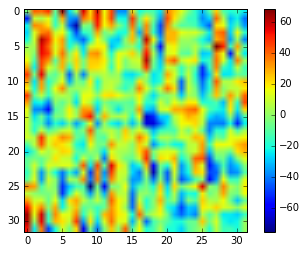

In [129]:
imshow(bf.cells[10,:,10,:]-bf.cells[10,:,10,:].mean())
colorbar()

In [ ]:
len(bf.blobs)

In [117]:
bf.noise

34.768425265080907

In [136]:
bf.leveled.shape

(3232, 4864)

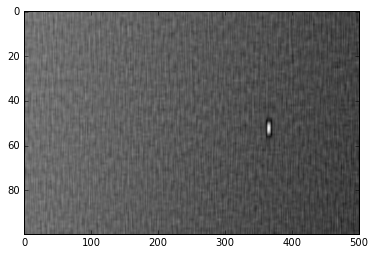

In [139]:
imshow(bf.leveled[2000:2100,1500:2000],aspect='auto',cmap=cm.gray)

In [40]:
im.shape

(3232, 4864)

In [41]:
3200/64.

50.0

In [43]:
4864/64.

76.0

In [52]:
bs = blobs.process_image(im[-(im.shape[0]/2-16):,-im.shape[1]/2:],blob_threshold=6)

11.7351484024


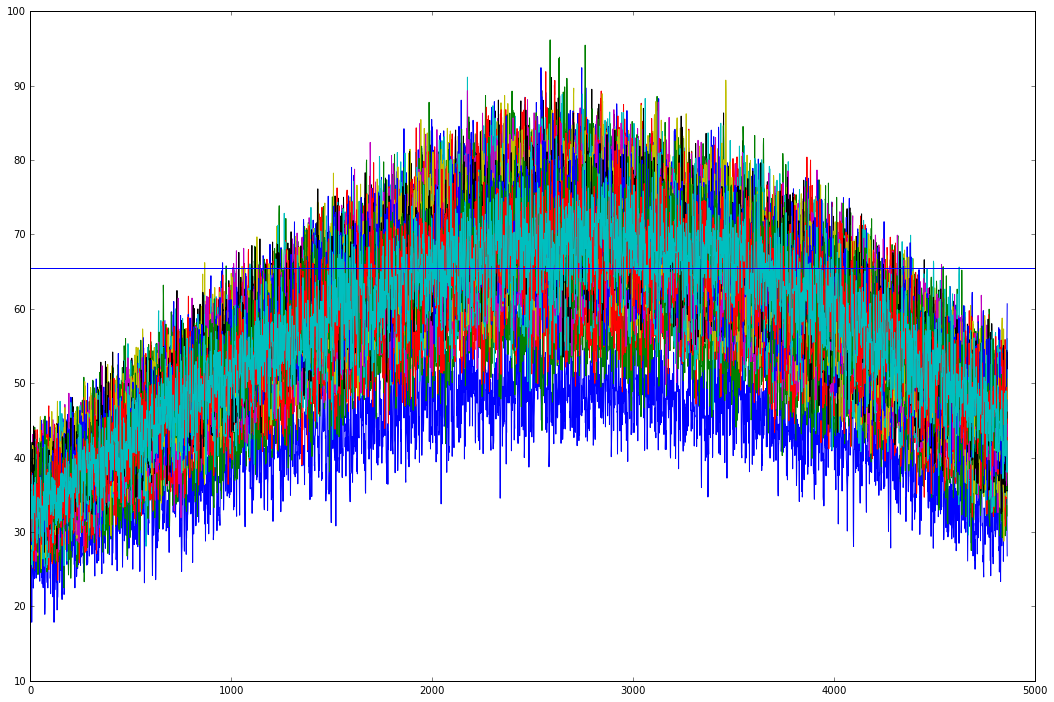

In [100]:
figure(figsize=(18,12))
for k in range(0,3200,128):
    plot(bf.leveled[k,:]/16.)
axhline(bf.global_noise)
#ylim(300,400)

In [101]:
bf.cells.shape

(50, 64, 76, 64)

In [139]:
im2 = im[:bf.leveled.shape[0],:bf.leveled.shape[1]]
cells = im2.reshape(bf.cells.shape)

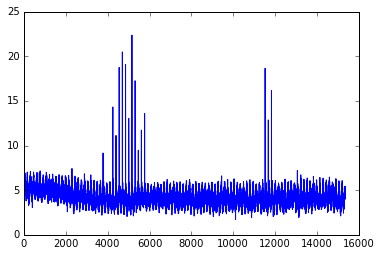

In [145]:
plot(20*np.log10(((cells/16.).std(axis=(1,3))**2/(cells/16.).mean(axis=(1,3),dtype='float')).flatten()/(4096./44e3)))

In [160]:
gains = (((cells/16.).std(axis=(1,3))**2/(cells/16.).mean(axis=(1,3),dtype='float'))/(4096./40e3))

In [161]:
gl=gains.flatten()
gl.sort()

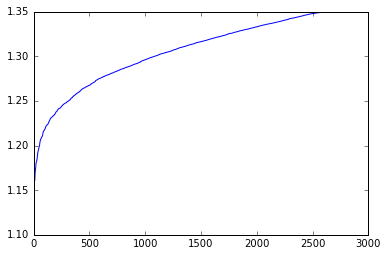

In [162]:
plot(gl[:gl.shape[0]//6])

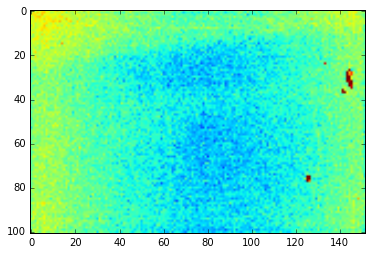

In [148]:
imshow(20*np.log10(gains))
clim(0,10)

In [105]:
4096/44e3

0.09309090909090909

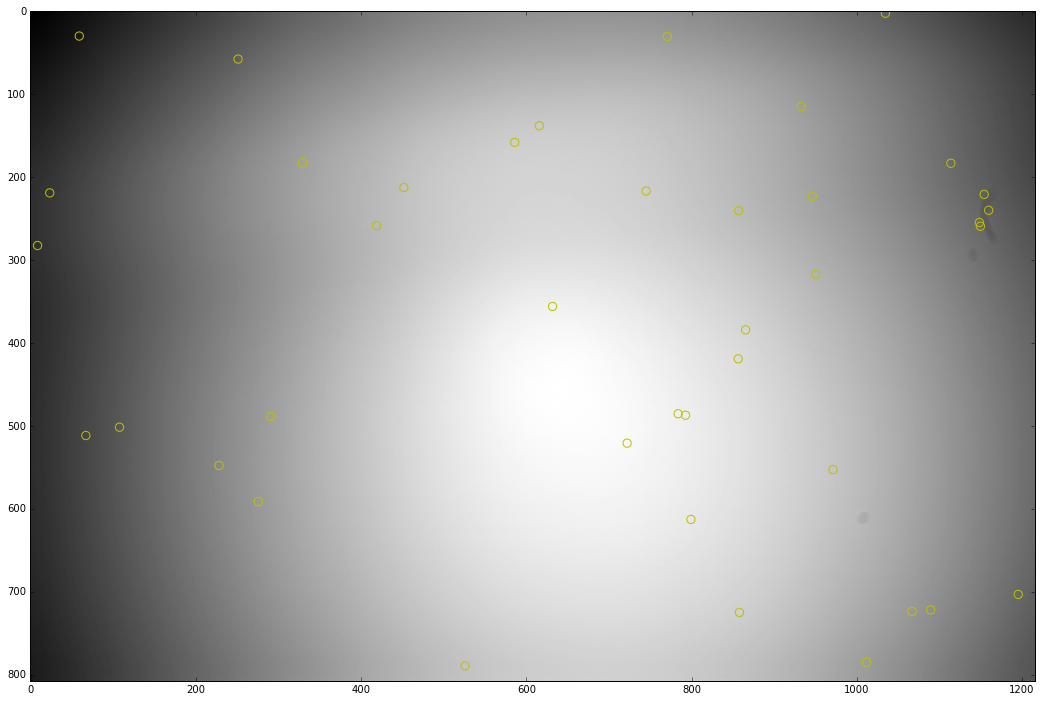

In [96]:
figure(figsize=(18,12))
ds = scipy.ndimage.gaussian_filter(im,3)[::4,::4]
imshow(ds,aspect='auto',cmap=cm.gray,interpolation='nearest')
#clim(0,1000)
ax = gca()
for blob in bf.blobs:
    ax.add_artist(Circle((blob.y/4.,blob.x/4.),linewidth=1,facecolor='none',edgecolor='y'))

In [163]:
import photutils
from photutils import DiscretePR

In [165]:
dao = photutils.daofind(im-np.median(im),3*np.std(im),fwhm=3.0,)

In [272]:
len(bs)

12

In [14]:
bf.blobs[:3]

[Blob(x=2110,y=1814,peak=1020.2096492473063,sigma=None,
 Blob(x=2517,y=2331,peak=669.81886772161204,sigma=None,
 Blob(x=2112,y=1814,peak=575.84126204183383,sigma=None]

/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


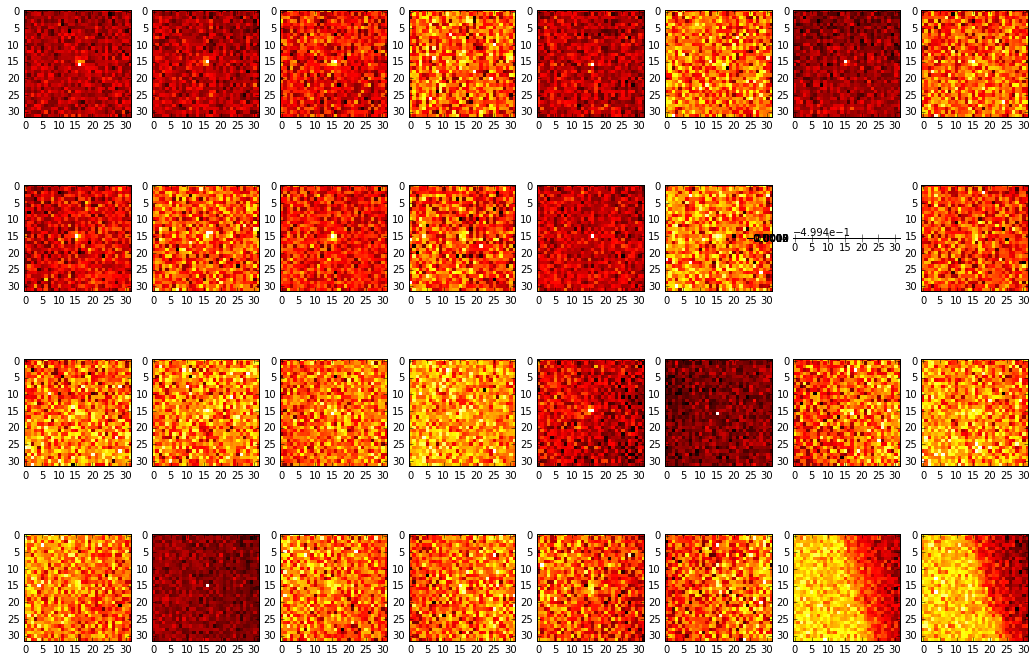

In [88]:
fig,axs = subplots(4,8,figsize=(18,12))
for k,ax in enumerate(axs.flatten()):
    if k >= len(bf.blobs):
        break
    blob = bf.blobs[k]
    ax.imshow(im[blob.x-16:blob.x+16,blob.y-16:blob.y+16],cmap=cm.hot,interpolation='nearest')

In [67]:
np.sort?

In [43]:
for b in bf.blobs[:12]:
    print b.x,b.y

324 4297
881 2483
398 3239
1570 3917
3154 4844
2228 3261
1195 3913
3190 3489
2264 3578
1688 2720
1079 1938
2125 2432
